In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
cols = ["arch", "activation", "attack", "iterations", "eps 2", "eps 4", "eps 6", "eps 8", "eps 10", "SROCC"]
data = pd.read_csv("rs/results.csv", header=0, usecols=header)

In [17]:
data.sample(5, random_state=0)

,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
4,resnet50,relu,IFGSM,1,0.031042,0.042281,0.045891,0.046948,0.047500,0.907343
9,resnet34,Fsilu,IFGSM,1,0.027351,0.049037,0.069476,0.090349,0.112500,0.831934
2,resnet34,relu,IFGSM,1,0.038686,0.058012,0.068479,0.074239,0.077611,0.901809
10,resnet18,Fsilu,IFGSM,1,0.028127,0.051919,0.073056,0.093081,0.112755,0.857626
6,wideresnet50,relu,IFGSM,1,0.022592,0.031409,0.035890,0.037915,0.038926,0.914137


In [53]:
data[(data["arch"]=="resnet18")&(data["activation"]=="relu")].loc[:,"eps 2": "eps 10"].values

array([[0.0395782 , 0.06026149, 0.07279069, 0.08142176, 0.08764526]])

/tmp/ipykernel_6680/2178214740.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig, axs = plt.subplots(2,2, figsize=(16,10), subplot_kw={"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})


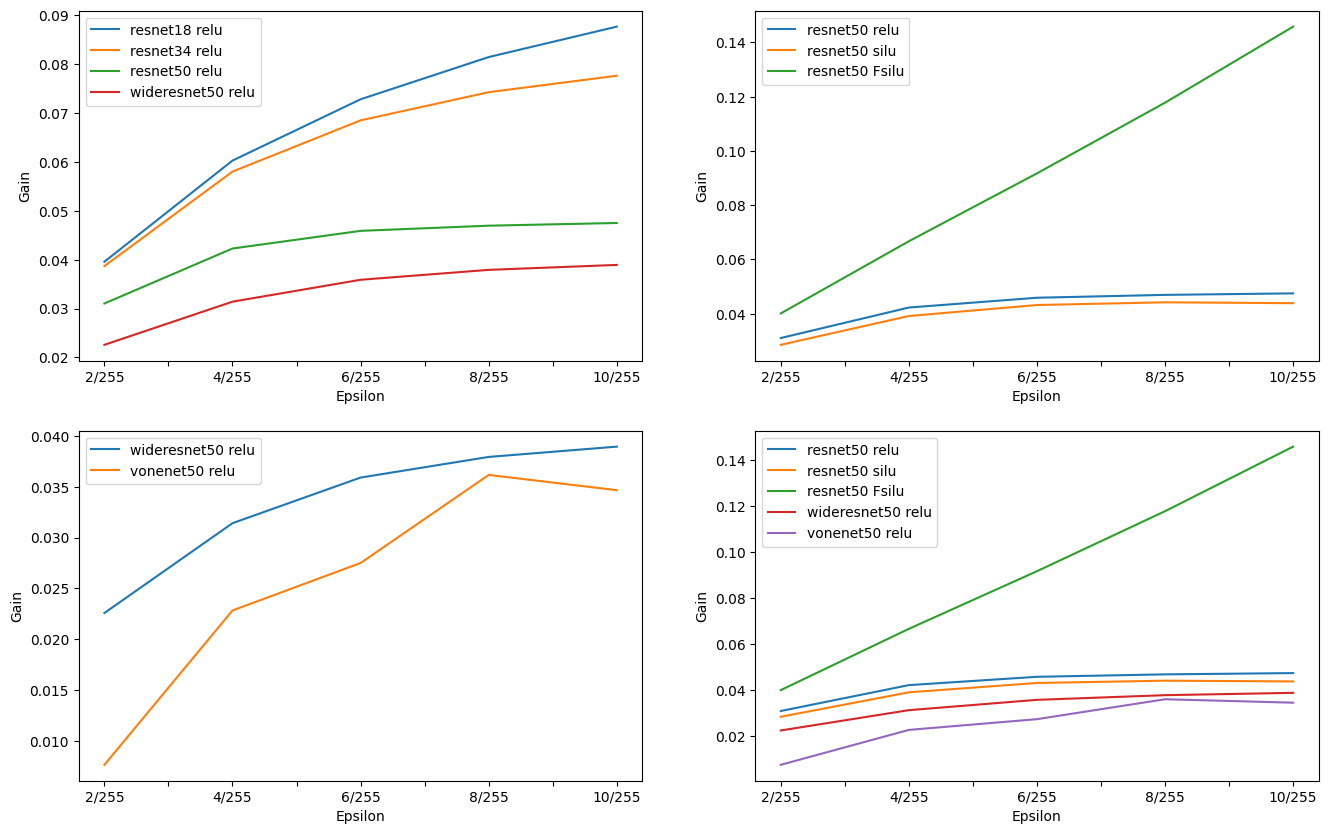

In [114]:
group1 = [("resnet18", "relu"), ("resnet34", "relu"), ("resnet50", "relu"), ("wideresnet50", "relu")]
group2 = [("resnet50", "relu"), ("resnet50", "silu"), ("resnet50", "Fsilu")]
group3 = [("wideresnet50", "relu"),("vonenet50", "relu")]
group = group2 + group3
groups = [group1, group2, group3, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']

fig, axs = plt.subplots(2,2, figsize=(16,10), subplot_kw={"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})

for i in range(4):
    axis = axs[i//2, i%2]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        axis.plot(epsilons, y_axis, label=f"{arch} {activ}")
    axis.legend(loc="upper left")

plt.show()
